Calculating VaR using different methods

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from pandas_datareader import data as wb
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ticker = 'MSFT'
data = yf.download(ticker, start = '2014-01-01', end = '2024-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [8]:
returns = np.log( 1+data.pct_change())

VaR using Historical Simulation

In [10]:
returns.sort_values()

Date
2020-03-16   -0.159453
2020-03-12   -0.099642
2015-01-27   -0.097099
2022-10-26   -0.080295
2016-04-22   -0.074411
                ...   
2020-03-24    0.086999
2015-10-23    0.096010
2015-04-24    0.099413
2020-03-13    0.132929
2014-01-02         NaN
Name: Adj Close, Length: 2516, dtype: float64

In [24]:
Var_95_d = returns.quantile(.05)
Var_99_d = returns.quantile(.01)

In [26]:
Var_95_w = Var_95_d * (5 ** 0.5)
Var_99_w = Var_99_d * (5 ** 0.5)

In [28]:
Var_95_m = Var_95_d * (20 ** 0.5)
Var_99_m = Var_99_d * (20 ** 0.5)

Text(0.5, 1.0, 'Daily VaR using Historical Simulation')

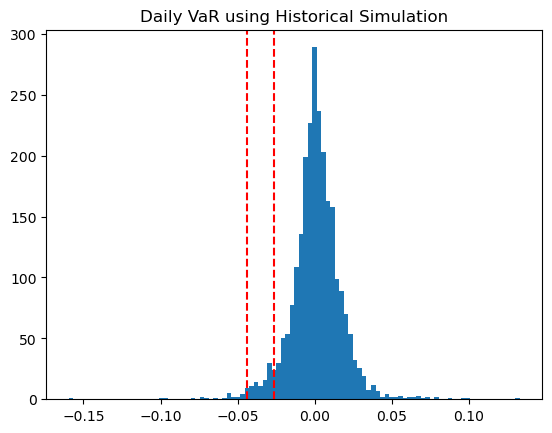

In [140]:
plt.hist(returns,bins = 100)
plt.axvline(Var_95_d,color = 'red',ls = '--')
plt.axvline(Var_99_d,color = 'red',ls = '--')
plt.title('Daily VaR using Historical Simulation')

VaR using Variance-Covariance Method

In [62]:
mean = returns.mean()
stdev = returns.std()

In [105]:
VaR_95_D = mean + norm.ppf(0.05) * stdev
VaR_99_D = mean + norm.ppf(0.01) * stdev

In [121]:
s = np.random.normal(mean,stdev,100000)

Text(0.5, 1.0, 'Daily VaR using Variance-Covariance Method')

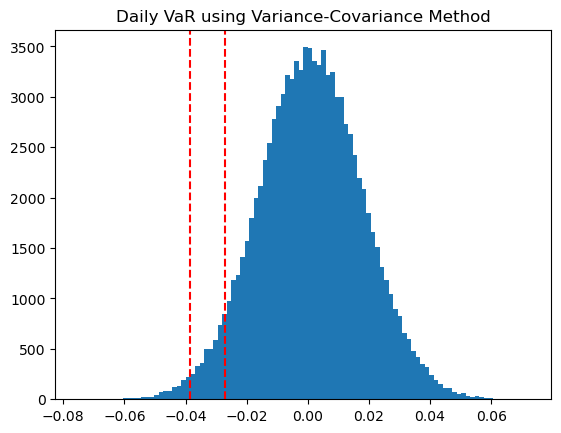

In [134]:
plt.hist(s, bins = 100)
plt.axvline(VaR_95_D,color = 'red',ls = '--')
plt.axvline(VaR_99_D,color = 'red',ls = '--')
plt.title('Daily VaR using Variance-Covariance Method')

VaR using Monte Carlo Simulation

In [466]:
mean = returns.mean()
stdev = returns.std()
simulations = 100000
num_days = 1 #Daily VaR

In [452]:
daily_returns = np.random.normal(mean,stdev, (simulations,num_days))

In [454]:
cum_returns = np.cumprod(1 + daily_returns,axis=1)

In [456]:
final_portfolio_values = cum_returns[:,-1] -1

In [458]:
VaR_95_daily = np.percentile(final_portfolio_values, 5) #/ (250 ** 0.5)
VaR_99_daily = np.percentile(final_portfolio_values, 1) #/ (250 ** 0.5)

In [460]:
VaR_95_daily

-0.02706573546858089

Text(0.5, 1.0, 'Daily VaR using Monte Carlo Simulation')

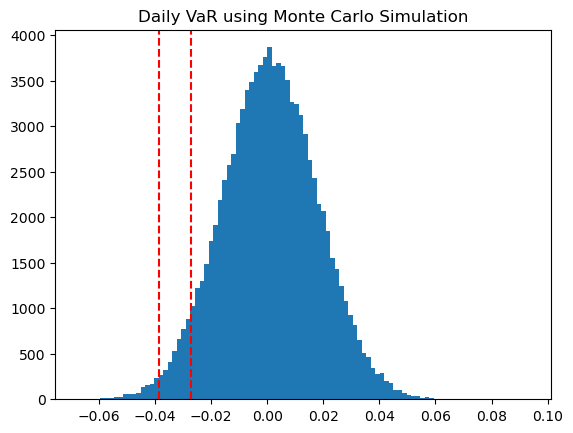

In [464]:
s = np.random.normal(mean,stdev,100000)

plt.hist(s, bins = 100)
plt.axvline(VaR_95_daily,color = 'red',ls = '--')
plt.axvline(VaR_99_daily,color = 'red',ls = '--')
plt.title('Daily VaR using Monte Carlo Simulation')